# Heatmap With Graph Objects

## From List Data

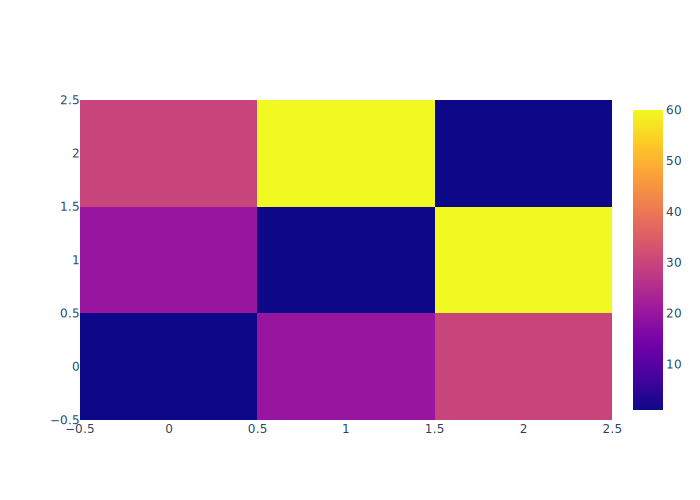

In [2]:
import plotly.graph_objects as go

go.Figure(data=go.Heatmap(
  z=[[1, 20, 30],
     [20, 1, 60],
     [30, 60, 1]]
))

## Categorical Axis

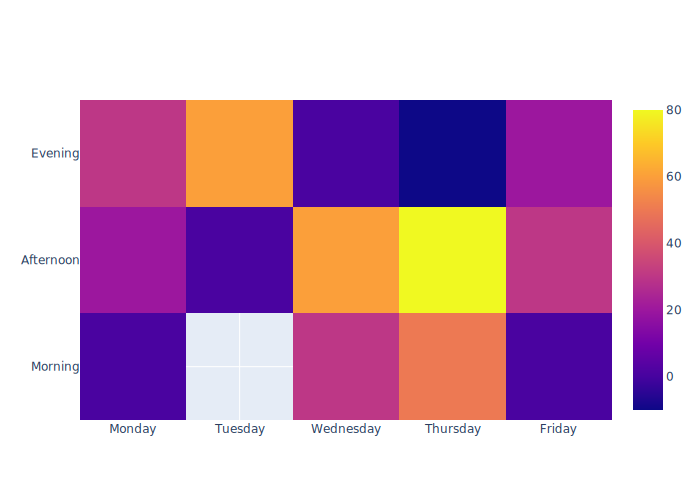

In [3]:
import plotly.graph_objects as go

go.Figure(data=go.Heatmap(
                   z=[[1, None, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'],
                   hoverongaps = False))

## Heatmap with Unequal Block Sizes

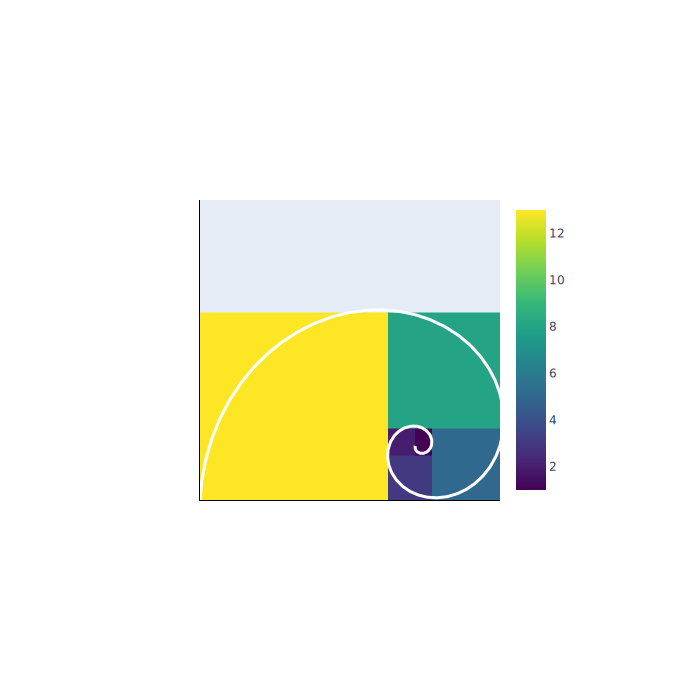

In [4]:
import plotly.graph_objects as go
import numpy as np

# Build the rectangles as a heatmap
# specify the edges of the heatmap squares
phi = (1 + np.sqrt(5) )/2. # golden ratio
xe = [0, 1, 1+(1/(phi**4)), 1+(1/(phi**3)), phi]
ye = [0, 1/(phi**3), 1/phi**3+1/phi**4, 1/(phi**2), 1]

z = [ [13,3,3,5],
      [13,2,1,5],
      [13,10,11,12],
      [13,8,8,8]
    ]

fig = go.Figure(data=go.Heatmap(
          x = np.sort(xe),
          y = np.sort(ye),
          z = z,
          type = 'heatmap',
          colorscale = 'Viridis'))

# Add spiral line plot

def spiral(th):
    a = 1.120529
    b = 0.306349
    r = a*np.exp(-b*th)
    return (r*np.cos(th), r*np.sin(th))

theta = np.linspace(-np.pi/13,4*np.pi,1000); # angle
(x,y) = spiral(theta)

fig.add_trace(go.Scatter(x= -x+x[0], y= y-y[0],
     line =dict(color='white',width=3)))

axis_template = dict(range = [0,1.6], autorange = False,
             showgrid = False, zeroline = False,
             linecolor = 'black', showticklabels = False,
             ticks = '' )

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    xaxis = axis_template,
    yaxis = axis_template,
    showlegend = False,
    width = 700, height = 700,
    autosize = False )

fig.show()

## Heatmap with Datetime Axis

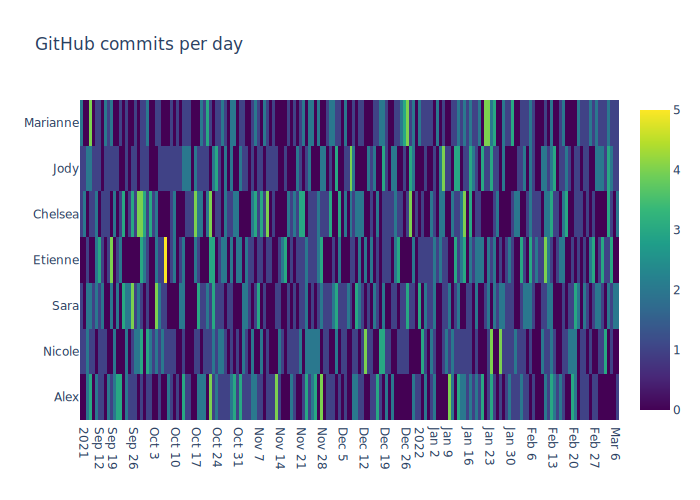

In [5]:
import plotly.graph_objects as go
import datetime
import numpy as np
np.random.seed(1)

programmers = ['Alex','Nicole','Sara','Etienne','Chelsea','Jody','Marianne']

base = datetime.datetime.today()
dates = base - np.arange(180) * datetime.timedelta(days=1)
z = np.random.poisson(size=(len(programmers), len(dates)))

fig = go.Figure(data=go.Heatmap(
        z=z,
        x=dates,
        y=programmers,
        colorscale='Viridis'))

fig.update_layout(
    title='GitHub commits per day',
    xaxis_nticks=36)

fig.show()

## Text on Heatmap Points

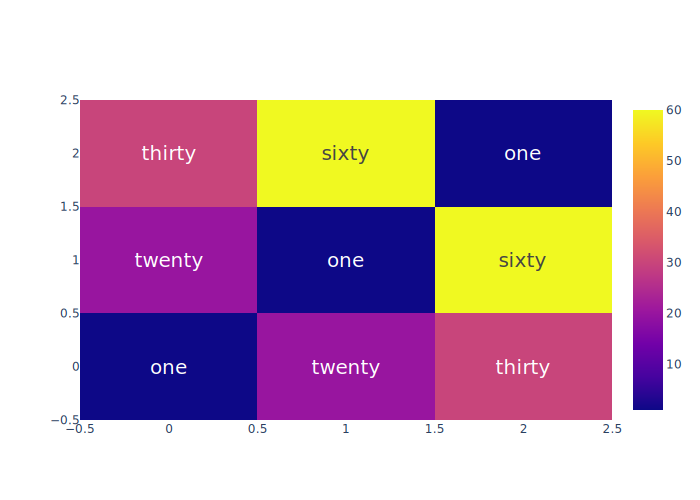

In [6]:
import plotly.graph_objects as go

go.Figure(data=go.Heatmap(
    z=[[1, 20, 30],
      [20, 1, 60],
      [30, 60, 1]],
    text=[['one', 'twenty', 'thirty'],
          ['twenty', 'one', 'sixty'],
          ['thirty', 'sixty', 'one']],
    texttemplate="%{text}",
    textfont={"size":20}))


## KNN : Multi-class prediction confidence Plot

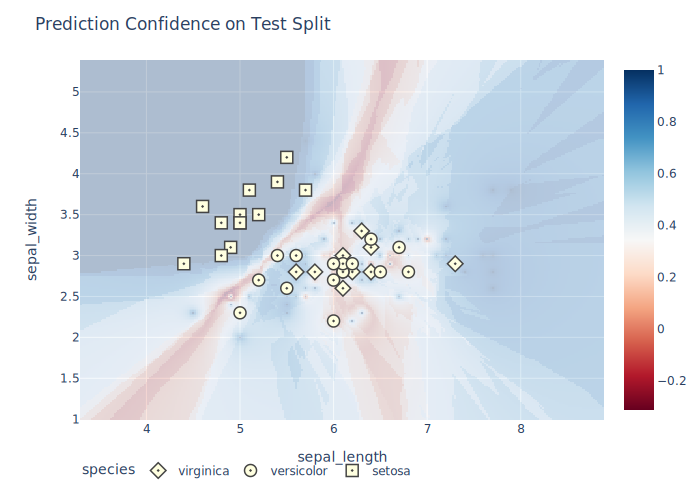

In [7]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 1

# We will use the iris data, which is included in px
df = px.data.iris()
df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)
X_train = df_train[['sepal_length', 'sepal_width']]
y_train = df_train.species_id

# Create a mesh grid on which we will run our model
l_min, l_max = df.sepal_length.min() - margin, df.sepal_length.max() + margin
w_min, w_max = df.sepal_width.min() - margin, df.sepal_width.max() + margin
lrange = np.arange(l_min, l_max, mesh_size)
wrange = np.arange(w_min, w_max, mesh_size)
ll, ww = np.meshgrid(lrange, wrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='distance')
clf.fit(X_train.values, y_train)
Z = clf.predict(np.c_[ll.ravel(), ww.ravel()])
Z = Z.reshape(ll.shape)
proba = clf.predict_proba(np.c_[ll.ravel(), ww.ravel()])
proba = proba.reshape(ll.shape + (3,))

# Compute the confidence, which is the difference
diff = proba.max(axis=-1) - (proba.sum(axis=-1) - proba.max(axis=-1))

fig = px.scatter(
    df_test, x='sepal_length', y='sepal_width',
    symbol='species',
    symbol_map={
        'setosa': 'square-dot',
        'versicolor': 'circle-dot',
        'virginica': 'diamond-dot'},
)
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.add_trace(
    go.Heatmap(
        x=lrange,
        y=wrange,
        z=diff,
        opacity=0.25,
        customdata=proba,
        colorscale='RdBu',
        hovertemplate=(
            'sepal length: %{x} <br>'
            'sepal width: %{y} <br>'
            'p(setosa): %{customdata[0]:.3f}<br>'
            'p(versicolor): %{customdata[1]:.3f}<br>'
            'p(virginica): %{customdata[2]:.3f}<extra></extra>'
        )
    )
)
fig.update_layout(
    legend_orientation='h',
    title='Prediction Confidence on Test Split'
)
fig.show()